In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset 1

In [2]:
blobs = pd.read_csv('cluster_blobs.csv')

In [4]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


In [5]:
blobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


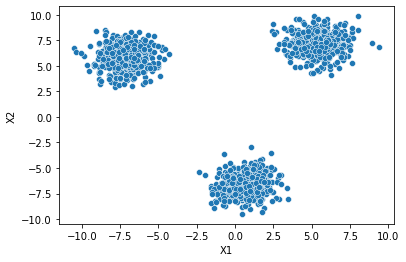

In [6]:
sns.scatterplot(data=blobs, x='X1', y='X2');

#### Dataset 2

In [7]:
moons = pd.read_csv('cluster_moons.csv')

In [8]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


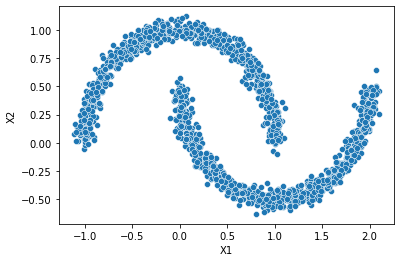

In [9]:
sns.scatterplot(data=moons, x='X1', y='X2');

#### Dataset 3

In [10]:
circles = pd.read_csv('cluster_circles.csv')

In [11]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


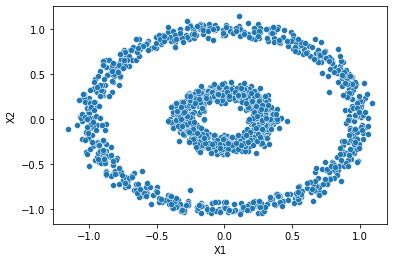

In [12]:
sns.scatterplot(data=circles, x='X1', y='X2');

### Now we'll use these 3 datsets to understand the diff b/w DBSCAN and KMeans

In [17]:
# We'll create a function
def display_categories(model, data):
    labels = model.fit_predict(data)
    
    # Show the scatterplot
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [18]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans(n_clusters=3) # Acc to us the expected no of clusters is 3

### KMeans on Dataset 1

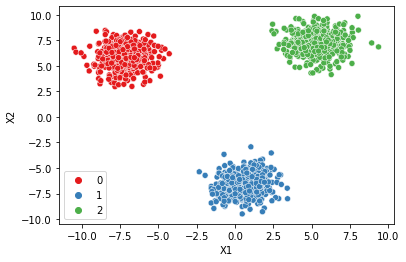

In [20]:
display_categories(model,blobs)

### KMeans on Dataset 2

In [23]:
model = KMeans(n_clusters=2) # As the moons dataset might have only 2 clusters

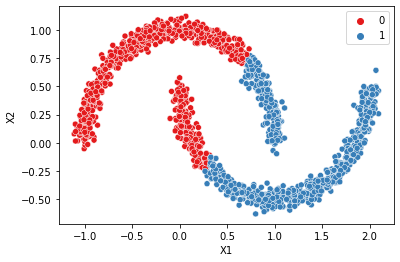

In [24]:
display_categories(model,moons)

### KMeans on Dataset 3

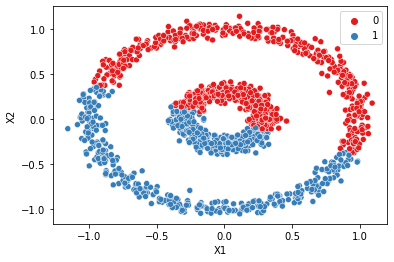

In [25]:
display_categories(model, circles)

#### We can see that because KMeans uses distance as a metric to seperate out clusters, it is not performing the way it should.

## DBSCAN

In [26]:
from sklearn.cluster import DBSCAN

In [28]:
#help(DBSCAN)

In [29]:
model = DBSCAN()

### DBSCAN on Dataset 1

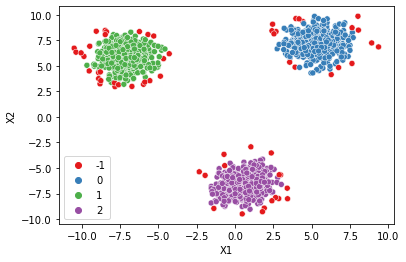

In [31]:
display_categories(model, blobs)

So we can see that along with being able to cluster the data into different clusters, DBSCAN is also really good with finding the outliers in the data based on the density of the points and the values it had for different hyperparameters and marks them seperately.

It just gives back that these outlier points are not close enough to the Core point to be considered as a part of the clusters.

### DBSCAN on Dataset 2

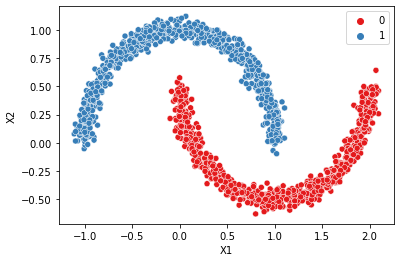

In [33]:
model = DBSCAN(eps=0.15)
display_categories(model, moons)

We can see that DBSCAN by using density was able to identify the unique cluster pattern/shape.

### DBSCAN on Dataset 3

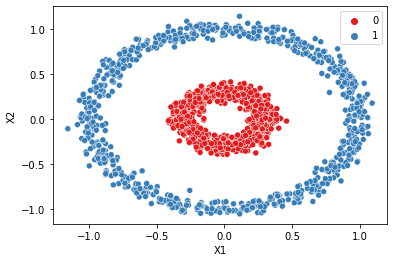

In [34]:
model = DBSCAN(eps=0.15)
display_categories(model, circles)